In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('train.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Se explora el panda y se determina la cantidad de filas, columnas y valores vacios y tipos de valores
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [41]:
#Se identifican las columnas con mayor numero de valores vacios NaN
test.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [44]:
#Se eliminan las 6 columnas con la mayoria de valores vacios (más de 100 valores)
test1 = test.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'], axis=1)

In [14]:
testnumb =test1.select_dtypes(np.number).head()
testnumb

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


(-0.3, 0.8)

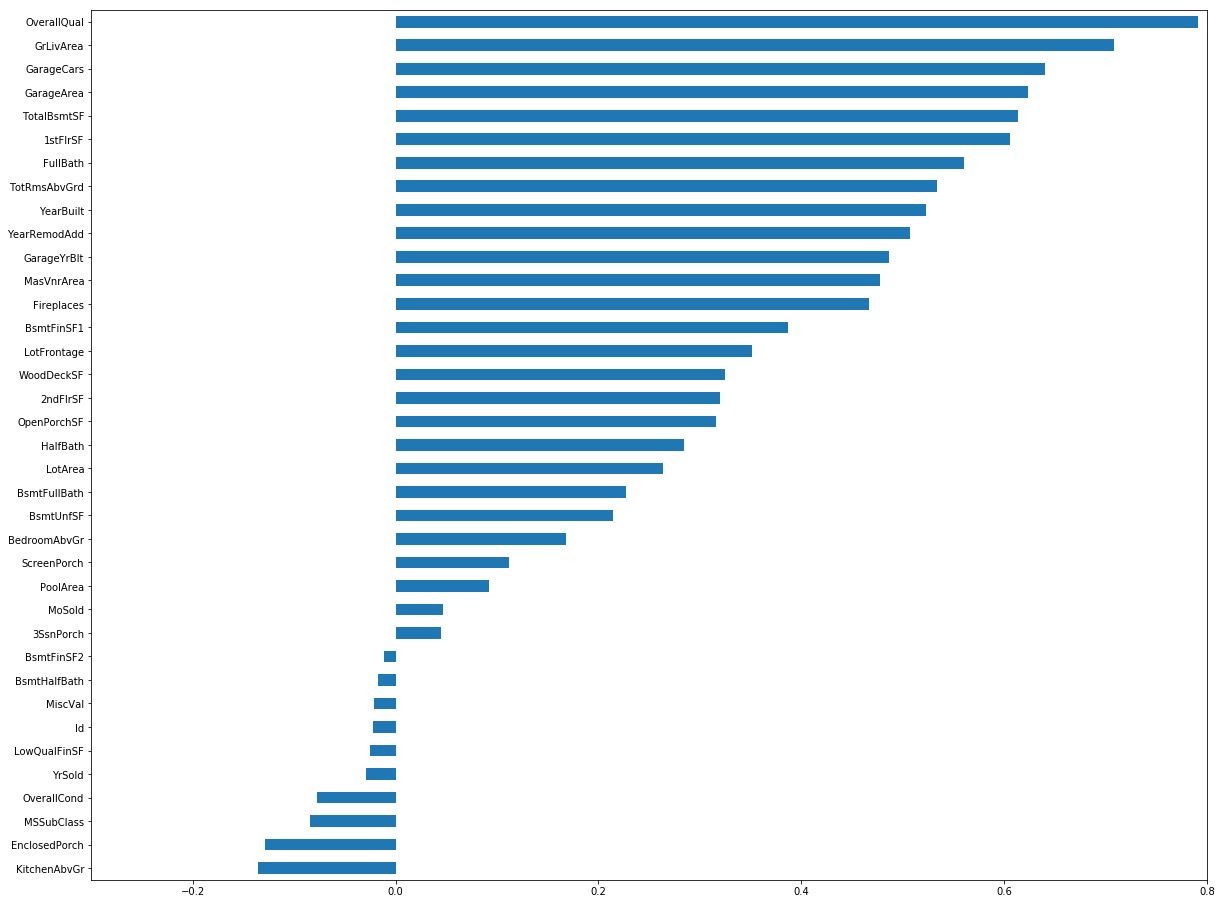

In [15]:
#only numeric columns identificar los valores de correlación
plt.figure(figsize=(20,16))
test1.corr()['SalePrice'][:-1].sort_values().plot(kind='barh').set_xlim(-0.3,0.8)

In [20]:
#Top higher numeric values correlational, in order to analyze it.
test1[['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath']].corr()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000


In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

X = sm.add_constant(test1[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath']])
Y = test.SalePrice
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print_model

C:\Users\52557\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     664.0
Date:                Fri, 02 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:56:24   Log-Likelihood:                -17496.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1452   BIC:                         3.505e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.029e+05   4922.947    -20.901      0.000   -1.13e+05   -9.32e+04
OverallQual  2.386e+04   1107.624     21.546      0.000    2.17e+04     2.6e+04
GrLivArea      42.4265      2.940     14.432      0.000      36.660      48.193
GarageCars   1.421e+04   3066.644      4.632      0.000    8190.426    2.02e+04
GarageArea     16.2997     10.535      1.547      0.122      -4.367      36.966
TotalBsmtSF    24.5285      4.325      5.671      0.000      16.044      33.013
1stFlrSF       11.1187      5.035      2.208      0.027       1.243      20.995
FullBath     1457.1365   2528.880      0.576      0.565   -3503.512    6417.785
==============================================================================
Omnibus:                      427.744   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38546.564
Skew:                          -0.293   Prob(JB):                         0.00
Kurtosis:                      28.165   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Se evaluan los valores de probabilidad de t: que superan el 0.05 (FullBath (0.56) / GarageArea (0.12))

In [57]:
#Test1 tiene las columnas eliminadas:
test2 = test1.select_dtypes('object')
test2.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


In [58]:
#25 tipos de valores en la columna Neighborhood, ¿afectan el valor del inmueble?
test2['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [60]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinType1     14

In [64]:
model = ols('SalePrice ~ C(MSZoning)+C(Street)+C(LotShape)+C(LandContour)+C(Utilities)+C(LotConfig)+C(LandSlope)+C(Condition1)+C(Condition2)+C(BldgType)+C(HouseStyle)+C(RoofStyle)+C(RoofMatl)+C(Exterior1st)+C(Exterior2nd)+C(MasVnrType)+C(ExterQual)+C(ExterCond)+C(Foundation)+C(BsmtQual)+C(BsmtCond)+C(BsmtExposure)+C(BsmtFinType1)+C(BsmtFinType2)+C(Heating)+C(HeatingQC)+C(CentralAir)', data=test1)
results = model.fit()
anova_table = sm.stats.anova_lm(results, typ=2)
anova_table

C:\Users\52557\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 13
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\52557\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\52557\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
C(MSZoning),6.515829e+10,4.0,9.860824,7.370408e-08
C(Street),2.053443e+07,1.0,0.012430,9.112437e-01
C(LotShape),9.250585e+09,3.0,1.866601,1.333633e-01
C(LandContour),1.115728e+09,3.0,0.225134,8.789541e-01
C(Utilities),6.453357e+08,1.0,0.390651,5.320680e-01
C(LotConfig),4.026295e+10,4.0,6.093251,7.405138e-05
C(LandSlope),1.853434e+08,2.0,0.056098,9.454484e-01
C(Condition1),2.748748e+10,8.0,2.079929,3.489581e-02
C(Condition2),4.776108e+10,7.0,4.130281,1.677326e-04
C(BldgType),1.554928e+11,4.0,23.531723,8.410075e-19


In [71]:
#Se puede armar una regresión a partir de data cualitativa?
X = sm.add_constant(test(['C(MSZoning)+C(Street)'])
Y = test.SalePrice
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print_model

SyntaxError: invalid syntax (<ipython-input-71-de988561ed35>, line 2)